In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
# Specify the input file
input_file = '../data/data_clustered.csv'

# Load the clustered data
df = pd.read_csv(input_file)

# Print the first 5 rows
df.head()

,categories,update_date,text,cluster
0,hep-ph,2008-11-26,calculation prompt diphoton production section...,5
1,math.CO cs.CG,2008-12-13,sparsity certifying decomposition algorithm el...,0
2,physics.gen-ph,2008-01-13,evolution earth moon dark matter field fluid e...,1
3,math.CO,2007-05-23,determinant stirling cycle number count unlabe...,2
4,math.CA math.FA,2013-10-15,dyadic lambda alpha lambda alpha compute lambd...,2


d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


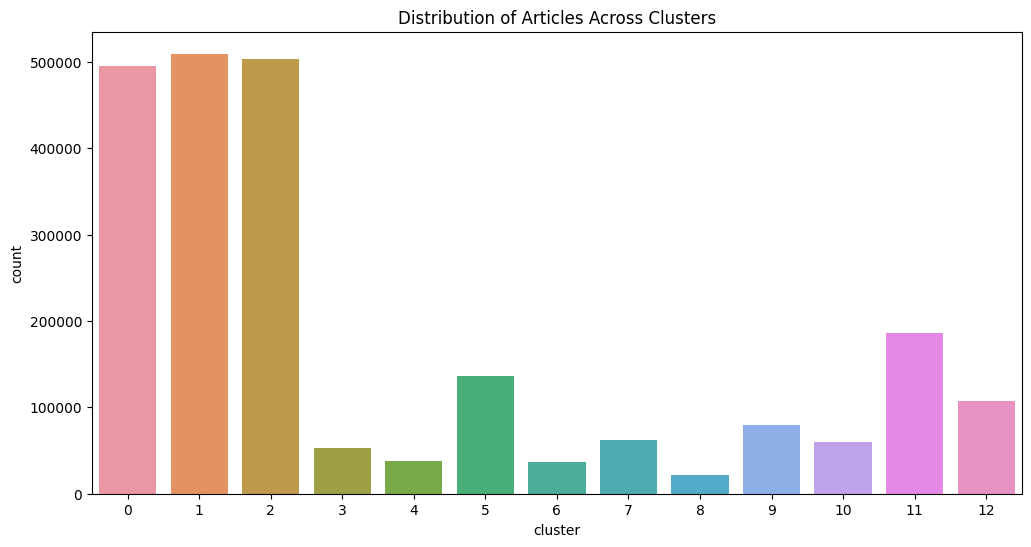

In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster')
plt.title('Distribution of Articles Across Clusters')
plt.savefig('../images/num_articles_each_cluster.png')
plt.show()


d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will 

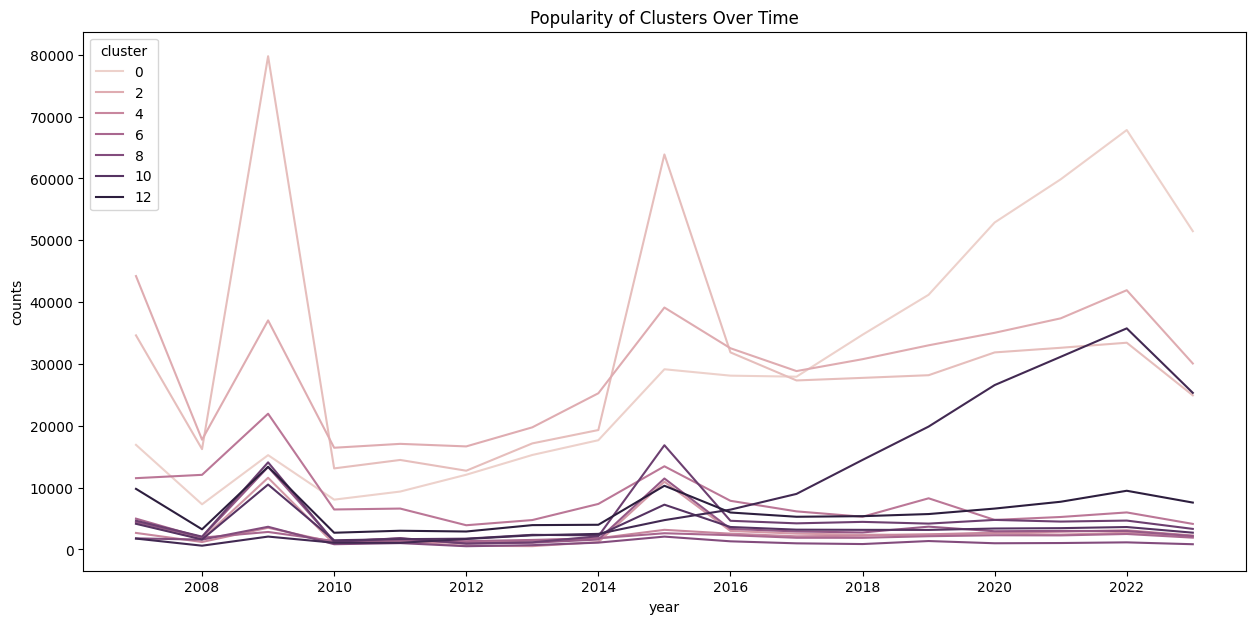

In [4]:
# Extract the year from the 'update_date' column
df['year'] = pd.to_datetime(df['update_date']).dt.year

cluster_popularity = df.groupby(['year', 'cluster']).size().reset_index(name='counts')
plt.figure(figsize=(15, 7))
sns.lineplot(data=cluster_popularity, x='year', y='counts', hue='cluster')
plt.title('Popularity of Clusters Over Time')
plt.savefig('../images/popularity_clusters_over_time.png')
plt.show()

       count
year        
2007  145888
2008   69343
2009  229060
2010   56201
2011   61841
2012   57300
2013   72027
2014   88119
2015  215104
2016  133623
2017  122520
2018  136216
2019  155679
2020  177518
2021  193581
2022  215220
2023  158884


d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


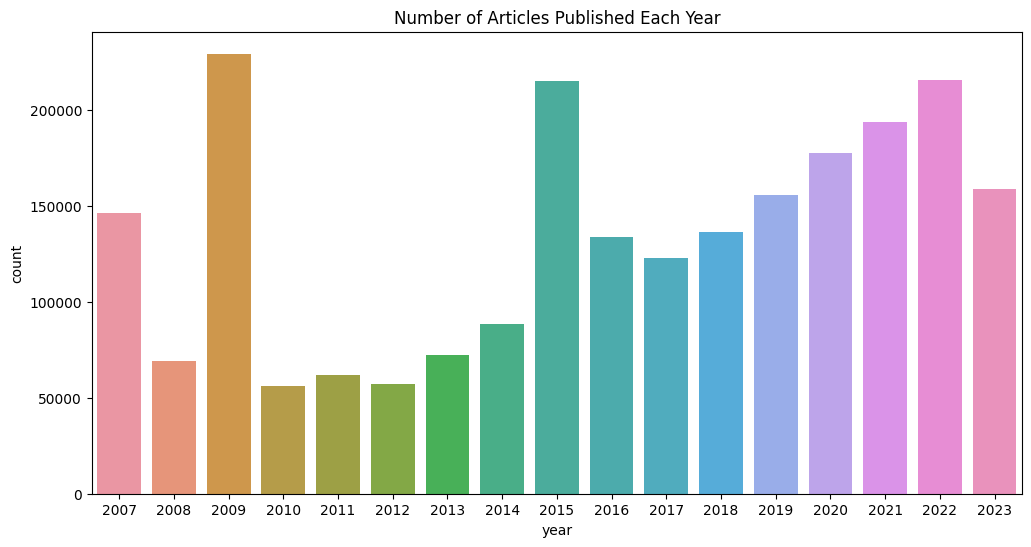

In [5]:
# Analyze the distribution of articles over time
year_counts = df['year'].value_counts().sort_index()
# Convert the series to a dataframe
year_counts = year_counts.to_frame()
year_counts.columns = ['count']
print(year_counts)


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year')
plt.title('Number of Articles Published Each Year')
plt.savefig('../images/num_articles_each_year.png')
plt.show()

d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


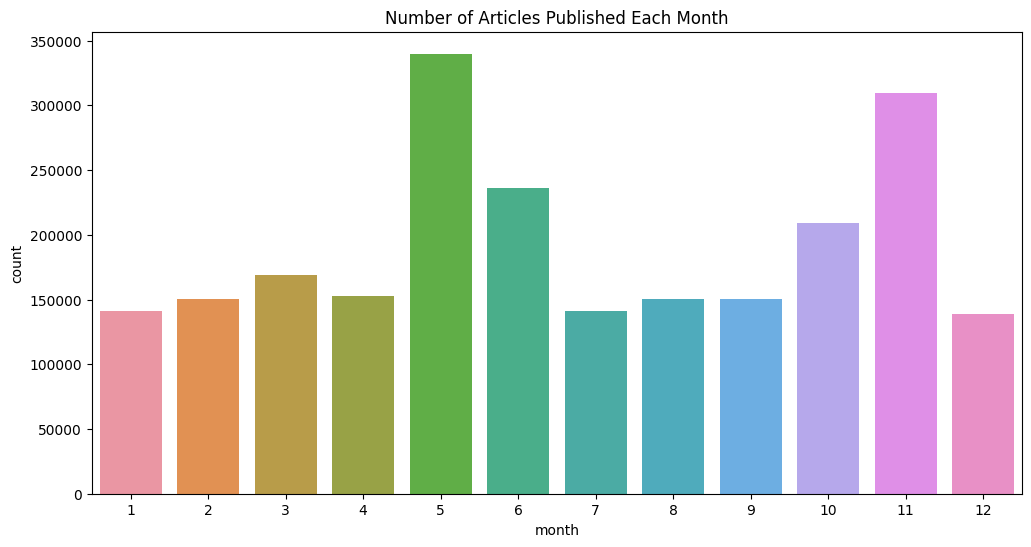

In [6]:
df['month'] = pd.to_datetime(df['update_date']).dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month')
plt.title('Number of Articles Published Each Month')
plt.savefig('../images/num_articles_each_month.png')
plt.show()

d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

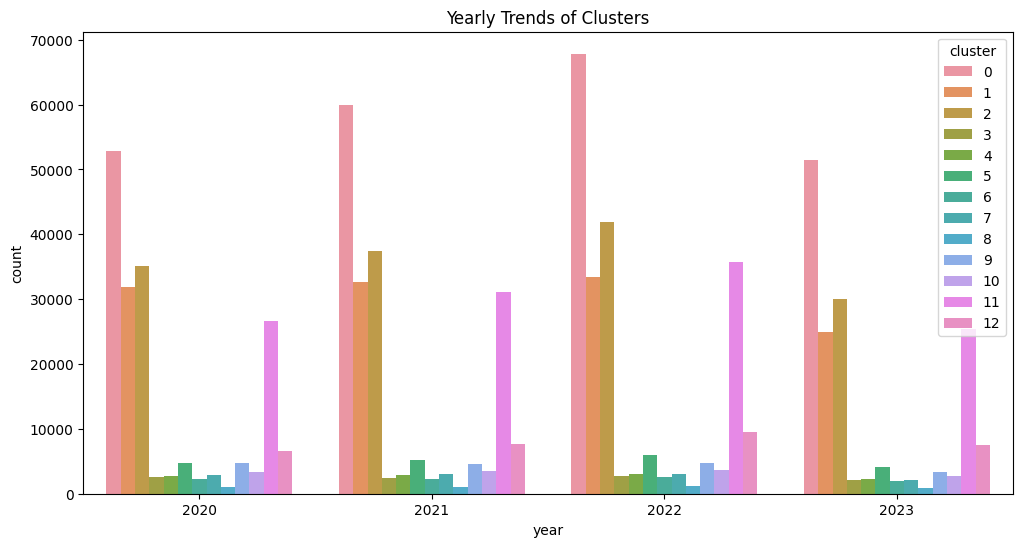

In [7]:
# Yearly trends of clusters after 2018
df = df[df['year'] >= 2020]
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='cluster')
plt.title('Yearly Trends of Clusters')
plt.savefig('../images/yearly_trends_clusters.png')
plt.show()

d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML-trend-analysis\Scientific-Trend-Analysis\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


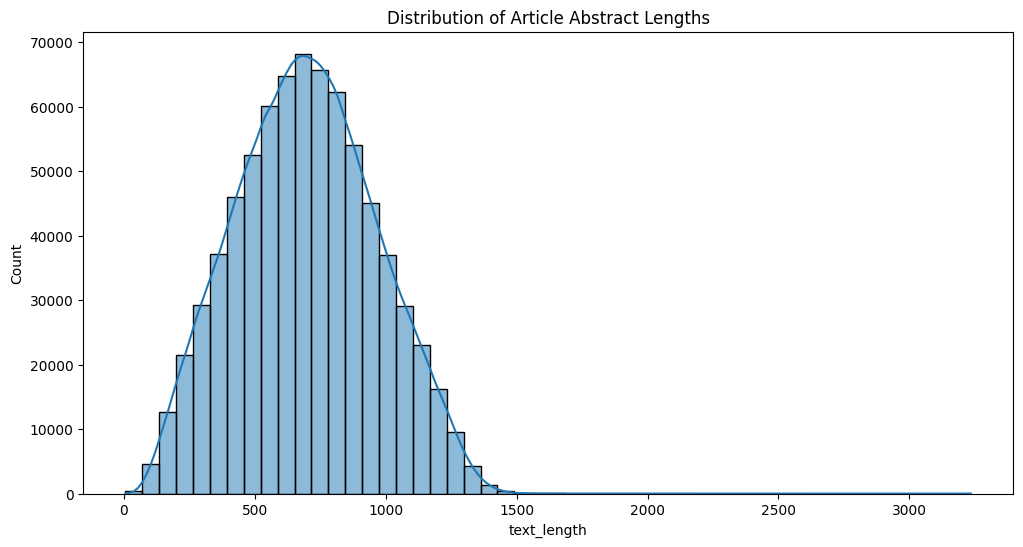

In [8]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Article Abstract Lengths')
plt.savefig('../images/distribution_article_lengths.png')
plt.show()

In [9]:
# Extract the primary category of each article
df['primary_category'] = df['categories'].apply(lambda x: x.split()[0])

# Analyze the distribution of primary categories in each cluster 
category_counts = df.groupby('cluster')['primary_category'].value_counts()

# Print the first 20 most common primary categories in each cluster
print(category_counts)


cluster  primary_category
0        cs.LG               20801
         cs.CL               18594
         cs.CV               12737
         cs.RO               10092
         math.OC              9530
                             ...  
12       eess.AS                 1
         cs.CG                   1
         cs.MA                   1
         astro-ph                1
         astro-ph.EP             1
Name: count, Length: 1370, dtype: int64


In [10]:
# Extract the year from the 'update_date' column
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Analyze the distribution of articles over time
year_counts = df['year'].value_counts().sort_index()
print(year_counts)

# Analyze the distribution of clusters over time
cluster_year_counts = df.groupby('year')['cluster'].value_counts()
print(cluster_year_counts)

# Analyze the distribution of primary categories over time
category_year_counts = df.groupby('year')['primary_category'].value_counts()
print(category_year_counts)

year
2020    177518
2021    193581
2022    215220
2023    158884
Name: count, dtype: int64
year  cluster
2020  0          52884
      2          35043
      1          31871
      11         26588
      12          6616
      9           4784
      5           4783
      10          3390
      7           2950
      4           2721
      3           2584
      6           2297
      8           1007
2021  0          59867
      2          37382
      1          32619
      11         31162
      12          7720
      5           5257
      9           4514
      10          3450
      7           3007
      4           2871
      3           2410
      6           2277
      8           1045
2022  0          67834
      2          41928
      11         35760
      1          33438
      12          9497
      5           5993
      9           4675
      10          3631
      4           3106
      7           2988
      3           2711
      6           2506
      8           115

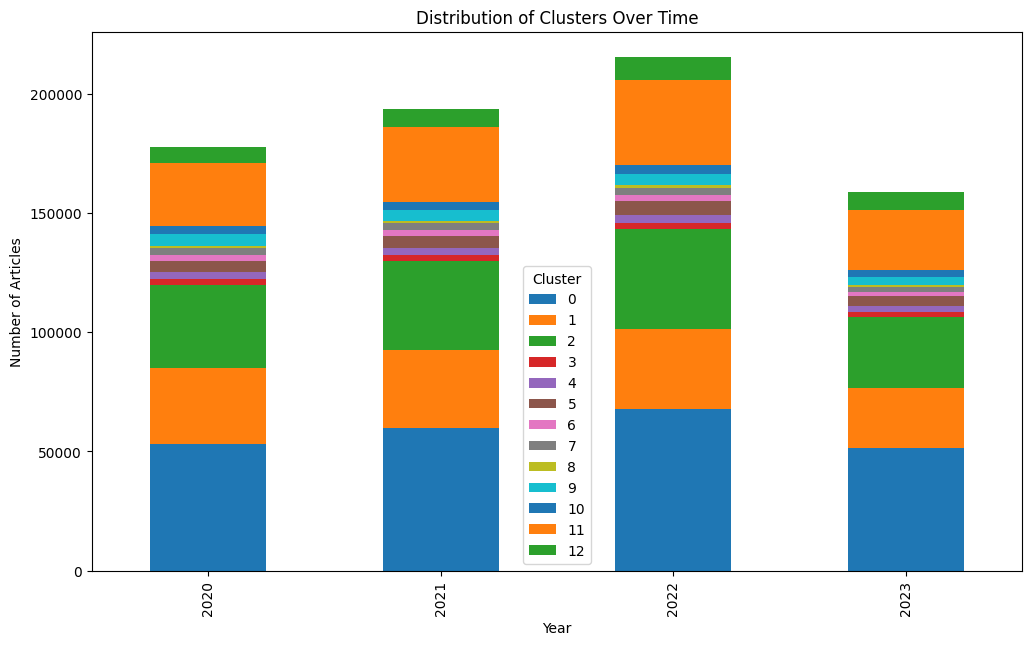

In [11]:
# Visualize the distribution of clusters over time
cluster_year_counts.unstack().plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Clusters Over Time')
plt.legend(title='Cluster')
plt.savefig('../images/distribution_clusters_over_time.png')
plt.show()

In [12]:
# replace category names with more readable names with mapping
category_map = {'cs.AI': 'Artificial Intelligence', 'cs.CL': 'Computation and Language', 'cs.CV': 'Computer Vision and Pattern Recognition', 'cs.LG': 'Machine Learning', 'cs.NE': 'Neural and Evolutionary Computing', 'cs.RO': 'Robotics', 'cs.SD': 'Sound', 'cs.SE': 'Software Engineering', 'cs.SI': 'Social and Information Networks', 'cs.DS': 'Data Structures and Algorithms', 'cs.DB': 'Databases', 'cs.DC': 'Distributed, Parallel, and Cluster Computing', 'cs.CG': 'Computational Geometry', 'cs.GT': 'Computer Science and Game Theory', 'cs.GR': 'Graphics', 'cs.HC': 'Human-Computer Interaction', 'cs.IR': 'Information Retrieval', 'cs.IT': 'Information Theory', 'cs.LO': 'Logic in Computer Science', 'cs.MA': 'Multiagent Systems', 'cs.MM': 'Multimedia', 'cs.MS': 'Mathematical Software', 'cs.NI': 'Networking and Internet Architecture', 'cs.OH': 'Other Computer Science', 'cs.OS': 'Operating Systems', 'cs.PF': 'Performance', 'cs.PL': 'Programming Languages', 'cs.RO': 'Robotics', 'cs.SC': 'Symbolic Computation'}


SyntaxError: unmatched ']' (1906472940.py, line 2)

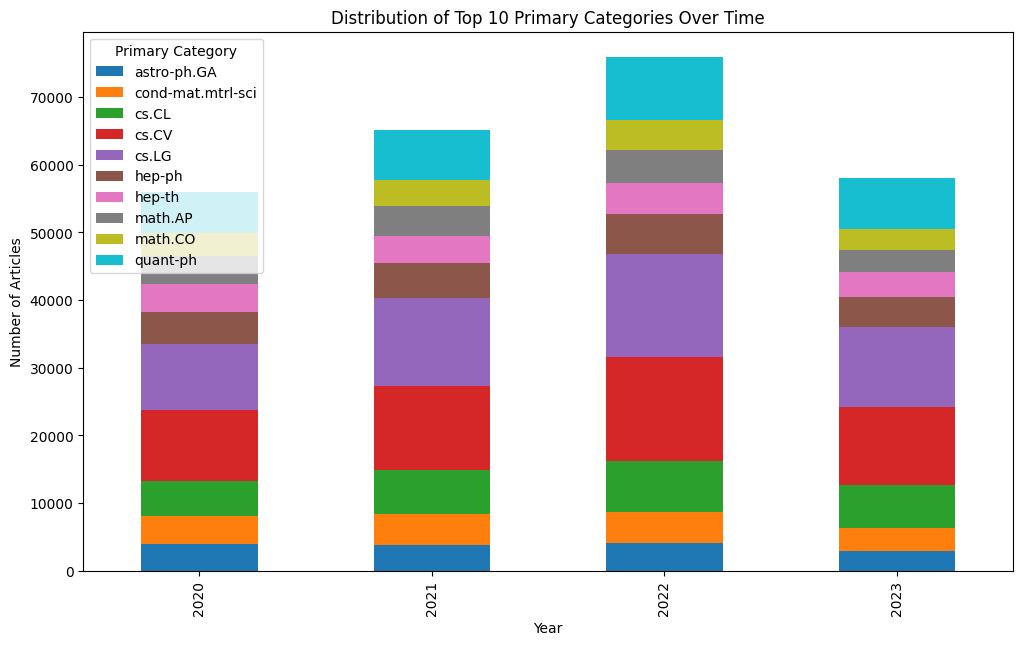

In [13]:
# Visualize the distribution of primary categories over time
top_categories = df['primary_category'].value_counts().index[:10]
category_year_counts = category_year_counts.reset_index(name='count')
category_year_counts = category_year_counts[category_year_counts['primary_category'].isin(top_categories)]
category_year_counts.pivot(index='year', columns='primary_category', values='count').plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Top 10 Primary Categories Over Time')
plt.legend(title='Primary Category')
plt.savefig('../images/distribution_top_10_categories_over_time.png')
plt.show()

In [21]:
# Visualize the distribution of primary categories with pie chart after 2018
df = df[df['year'] >= 2020]
category_counts = df['primary_category'].value_counts()
category_counts = category_counts.reset_index(name='count')
category_counts = category_counts[category_counts['count'] > 100]
category_counts['index'] = category_counts['index'].map(category_map)
plt.figure(figsize=(12, 12))
plt.pie(category_counts['count'], labels=category_counts['index'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Primary Categories')
plt.savefig('../images/distribution_primary_categories.png')
plt.show()

# Extract the year from the 'update_date' column
df['year'] = pd.to_datetime(df['update_date']).dt.year

# Analyze the distribution of articles over time
year_counts = df['year'].value_counts().sort_index()
print(year_counts)

# Analyze the distribution of clusters over time
cluster_year_counts = df.groupby('year')['cluster'].value_counts()
print(cluster_year_counts)

# Analyze the distribution of primary categories over time
category_year_counts = df.groupby('year')['primary_category'].value_counts()
print(category_year_counts)


KeyError: 'index'

                                                 count
primary_category                                      
cs.CV                                            28310
quant-ph                                         16307
cs.CL                                            12512
math.AP                                          11656
cs.LG                                            10280
...                                                ...
cond-mat.mtrl-sci cond-mat.str-el cs.SY eess.SY      1
math.AP math-ph math.CA math.FA math.MP math.SP      1
math.OC cs.RO cs.SY eess.SP eess.SY                  1
q-fin.CP cs.CE econ.EM math.OC                       1
supr-con cond-mat.supr-con                           1

[43481 rows x 1 columns]
              category  count
436              cs.CV  28310
24            quant-ph  16307
126              cs.CL  12512
29             math.AP  11656
86               cs.LG  10280
35   cond-mat.mtrl-sci  10007
522        astro-ph.GA   9808
10             math

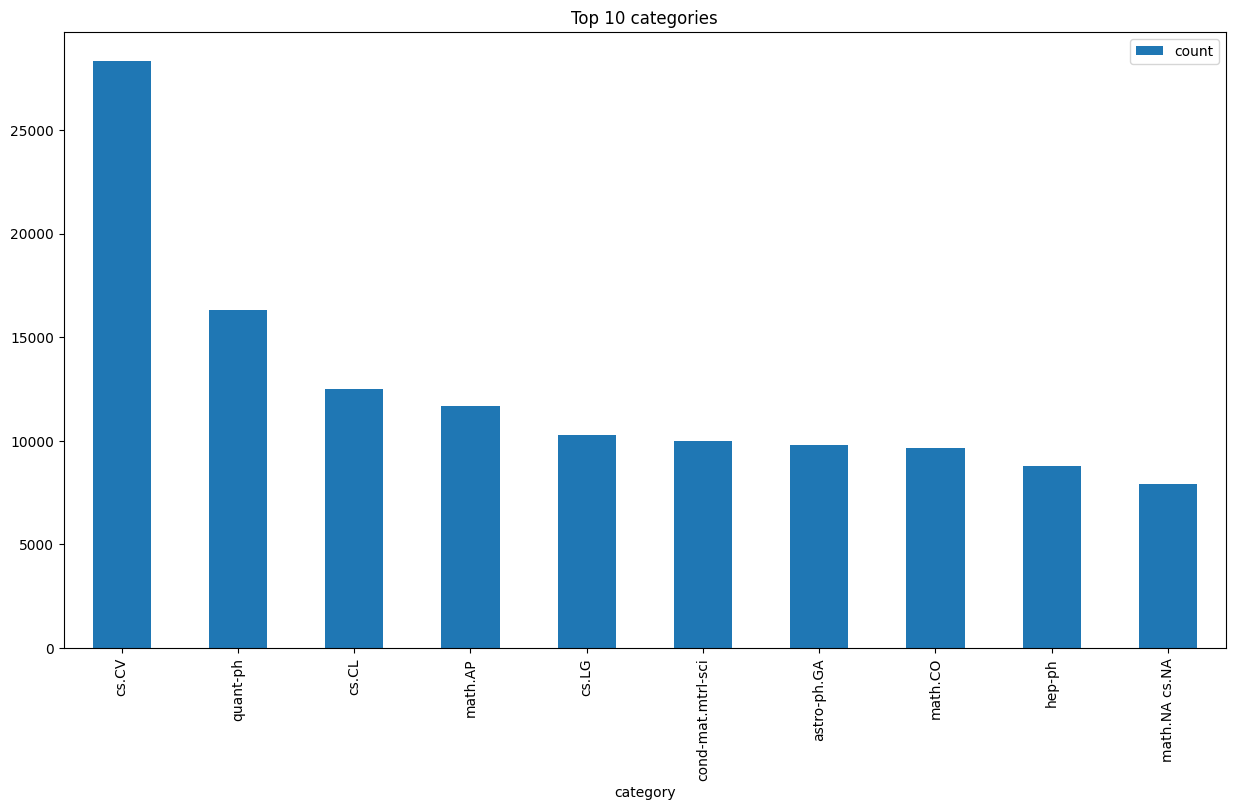

In [16]:
# split categories column into a list of categories for each article
df['categories'] = df['categories'].str.split('|')

# specify primary categories for each article as the first category in the list of categories 
df['primary_category'] = df['categories'].apply(lambda x: x[0]) 


# count the number of articles in each primary category
category_counts = df['primary_category'].value_counts()
# convert the series to a dataframe
category_counts = category_counts.to_frame()
category_counts.columns = ['count']
print(category_counts)


# create a list of all categories
all_categories = []
for categories in df['categories']:
    all_categories.extend(categories)

# count the number of occurrences of each category
category_counts = Counter(all_categories)
# convert the dictionary to a dataframe
category_counts = pd.DataFrame.from_dict(category_counts, orient='index').reset_index()
category_counts.columns = ['category', 'count']
# sort the dataframe by count
category_counts = category_counts.sort_values(by='count', ascending=False)
print(category_counts.head(10))

# plot the top 10 categories
category_counts.head(10).plot(kind='bar', x='category', y='count', figsize=(15, 8), title='Top 10 categories')
plt.savefig('../images/top_10_categories.png')
plt.show()

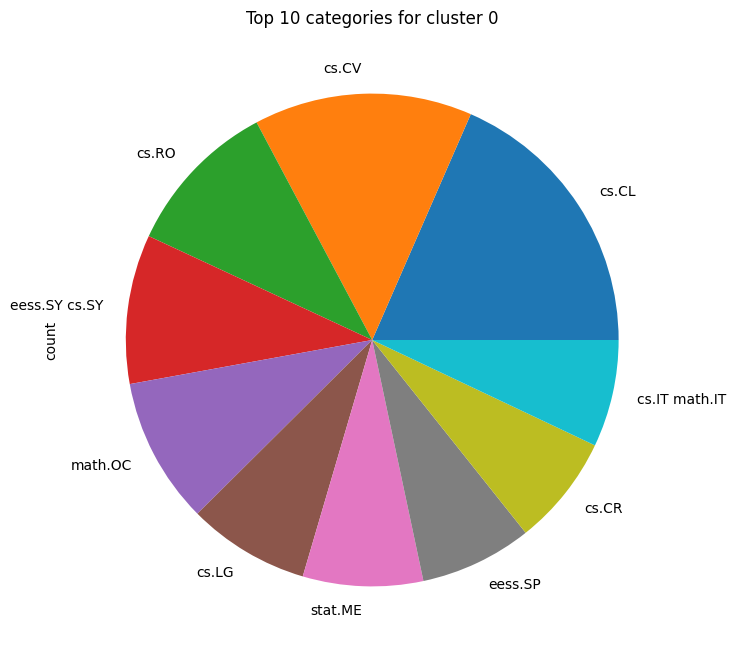

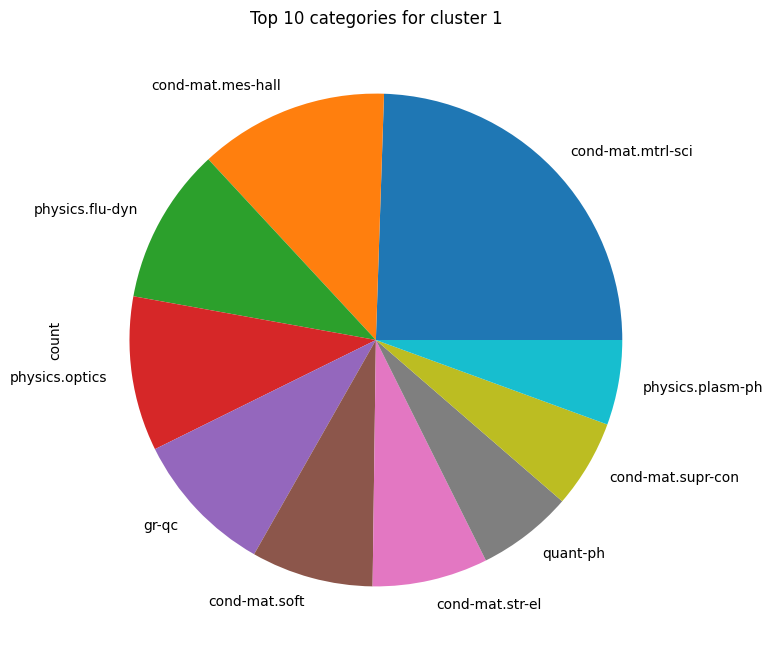

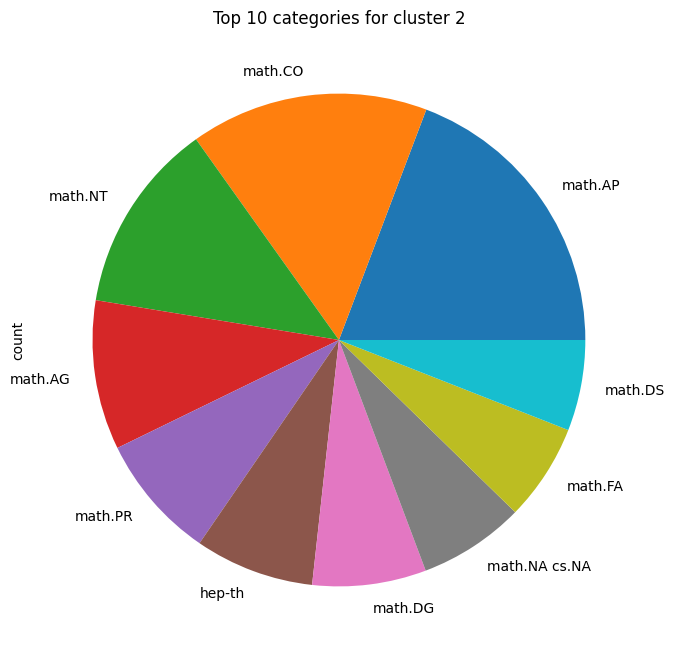

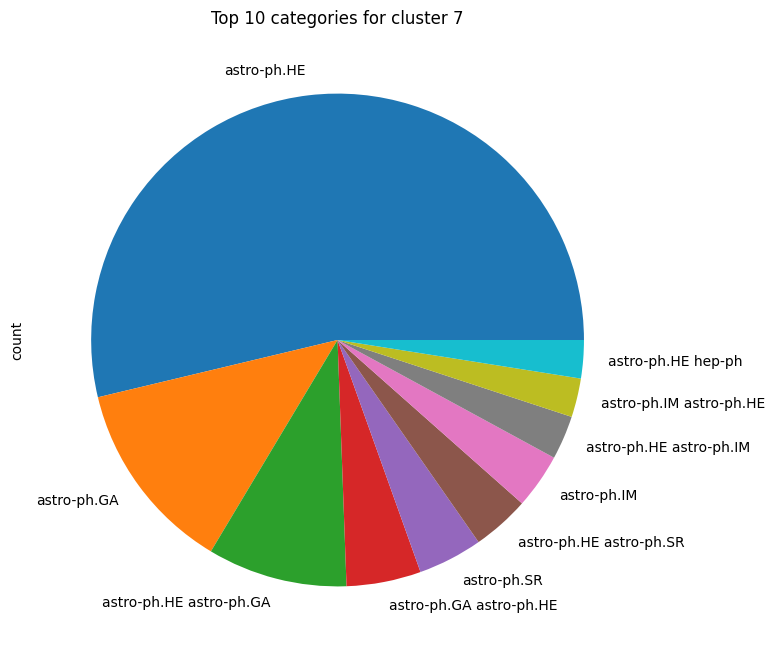

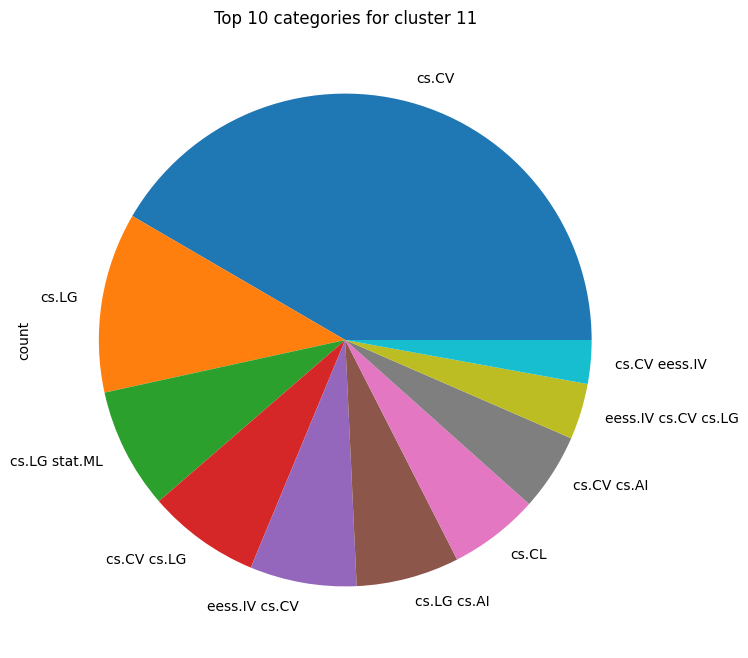

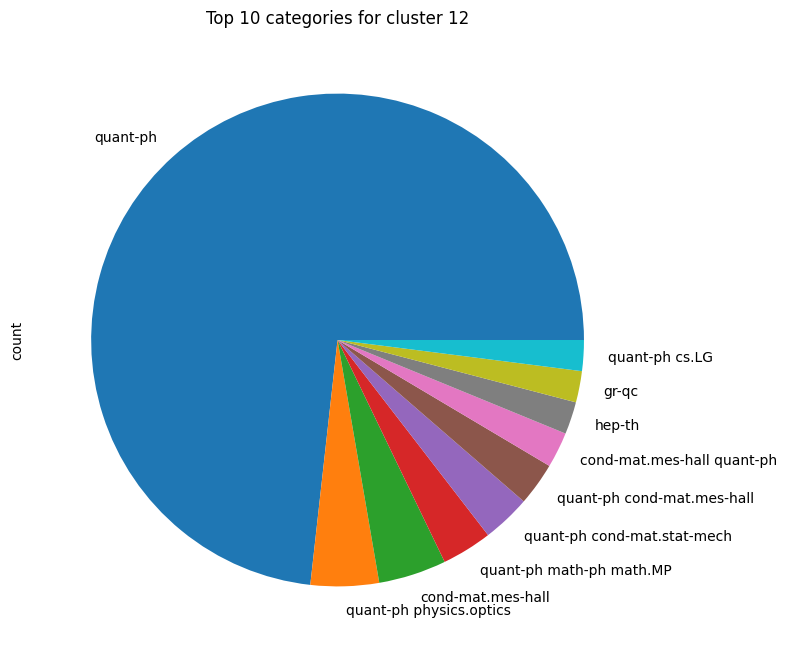

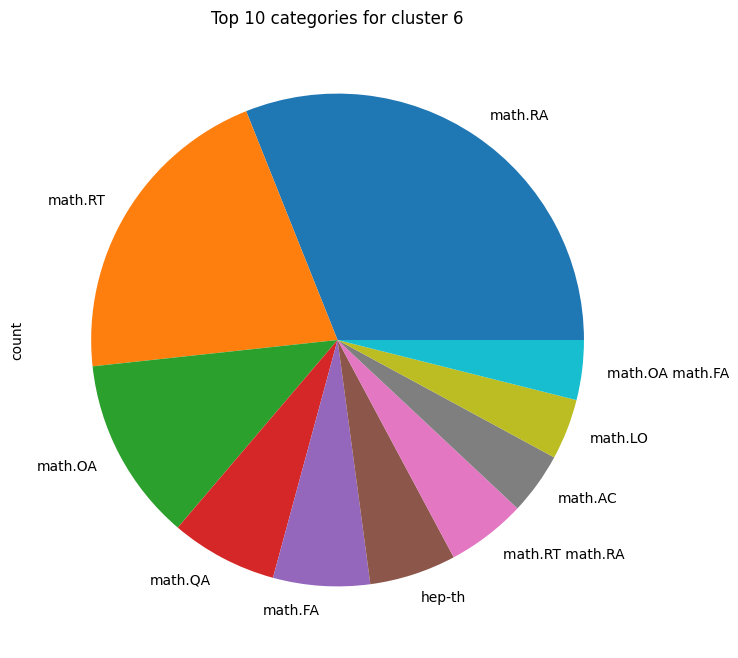

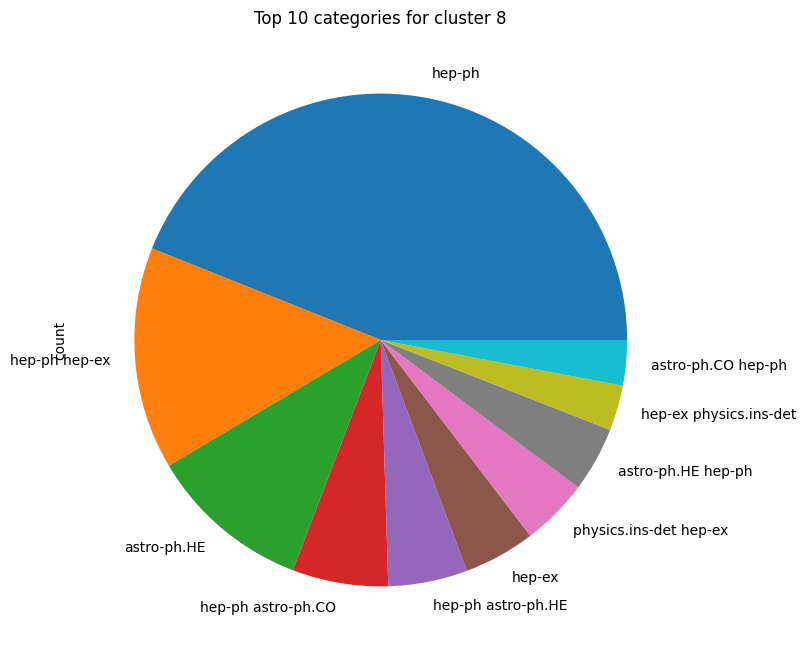

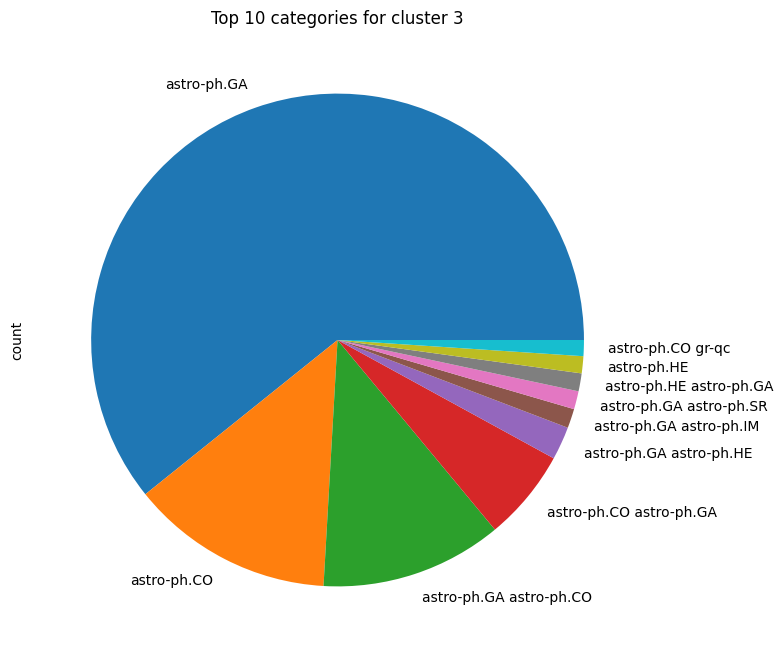

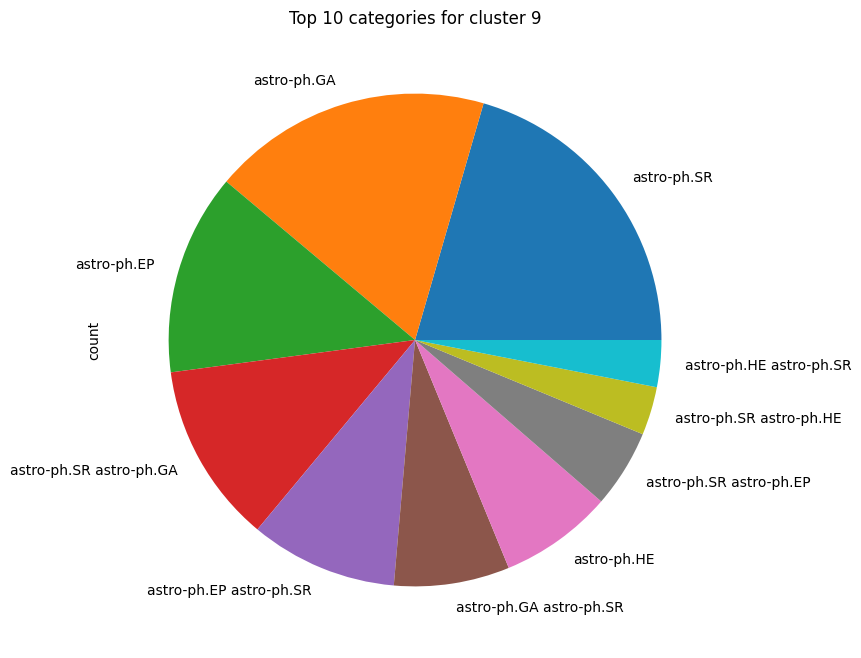

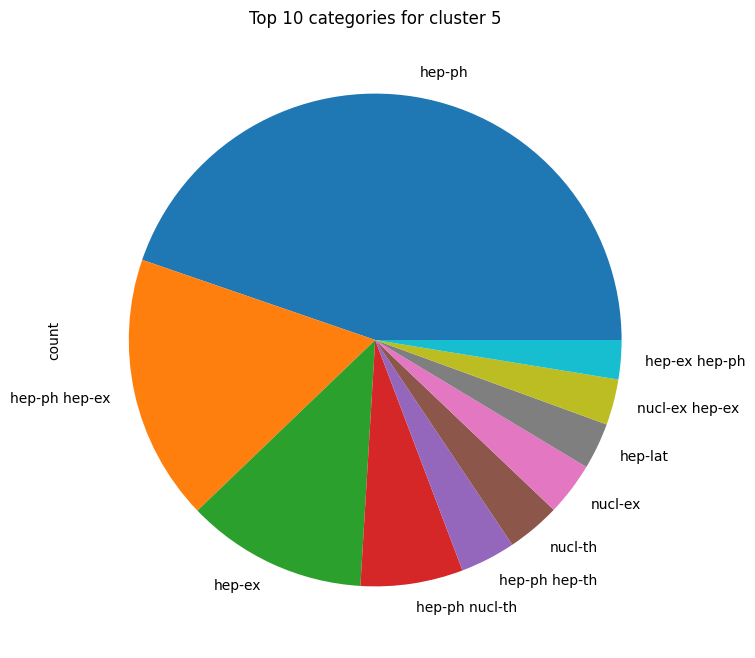

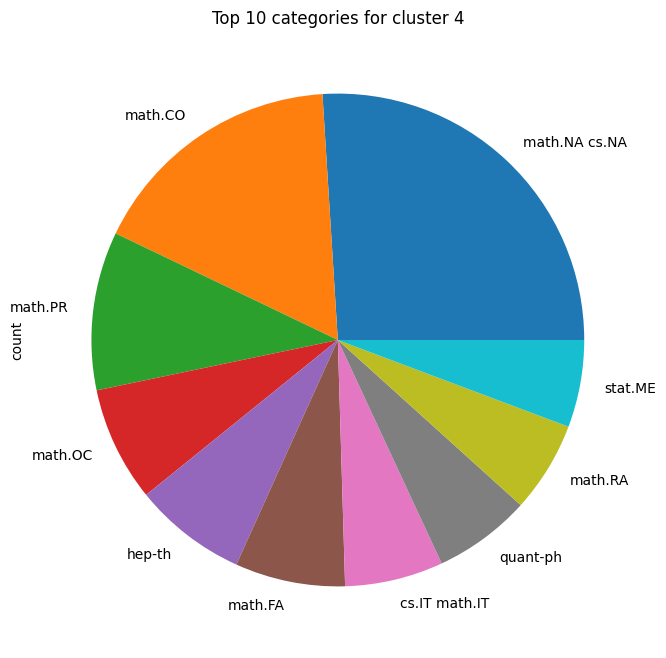

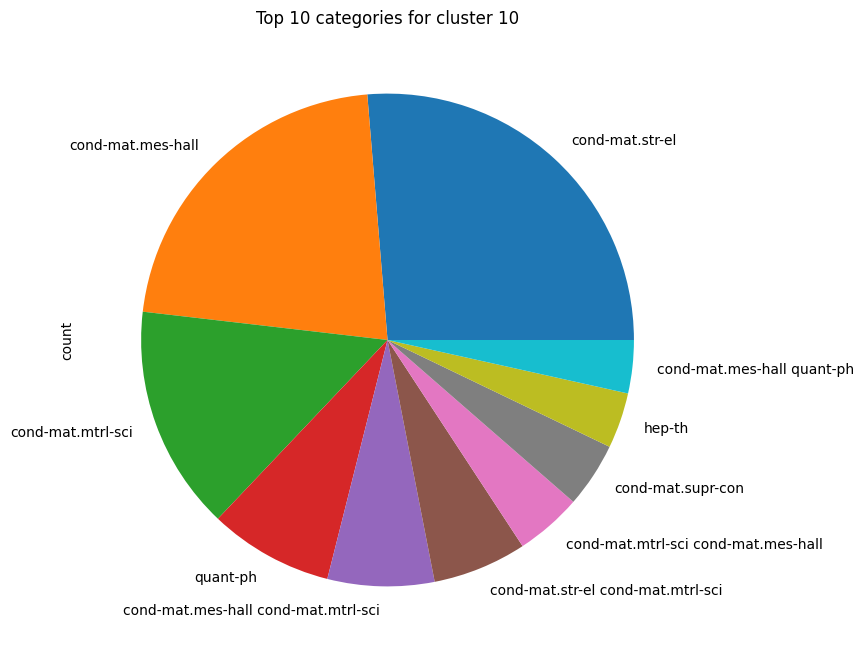

In [17]:
# for each cluster find frequent primary categories and plot them using pie chart
for cluster in df['cluster'].unique():
    # filter the dataframe for the current cluster
    df_cluster = df[df['cluster'] == cluster]
    # count the number of articles in each primary category
    category_counts = df_cluster['primary_category'].value_counts()
    # convert the series to a dataframe
    category_counts = category_counts.to_frame()
    category_counts.columns = ['count']
    # plot the top 10 categories
    category_counts.head(10).plot(kind='pie', y='count', figsize=(15, 8), title='Top 10 categories for cluster ' + str(cluster), legend=False)
    plt.savefig('../images/top_10_categories_cluster_' + str(cluster) + '.png')
    plt.show()